<a href="https://colab.research.google.com/github/dineshssdn-867/Cryptograpaphy/blob/main/Notebooks/Image_Crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input Image Dimension =  806


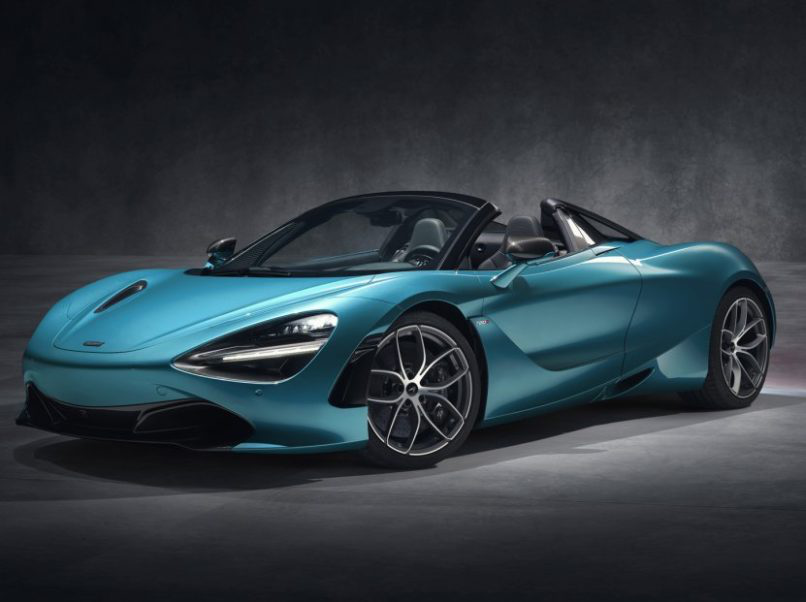

Key Dimension =  (1806, 1806)
Reshaped 2D Input Image Dimension =  (1806, 806)


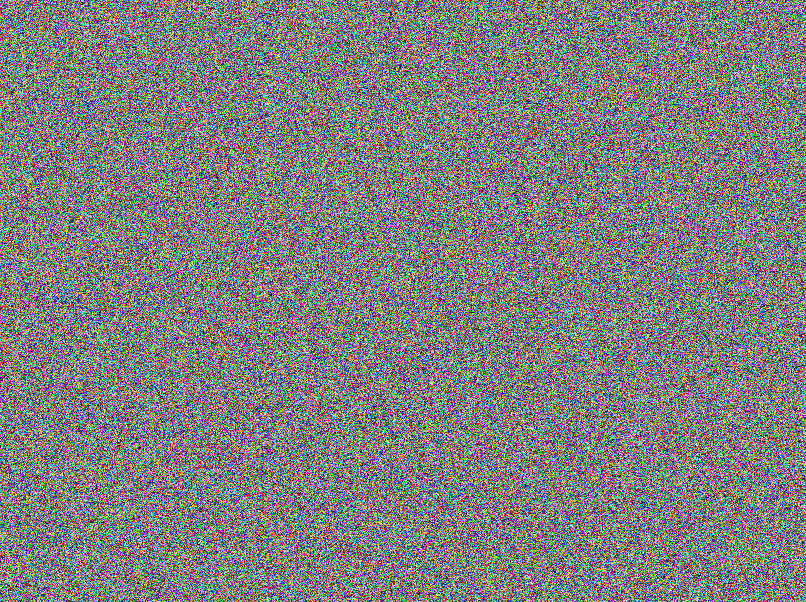

Decrypted 2D Image Dimension =  (1806, 806)
Decrypted Image Dimension =  (602, 806, 3)


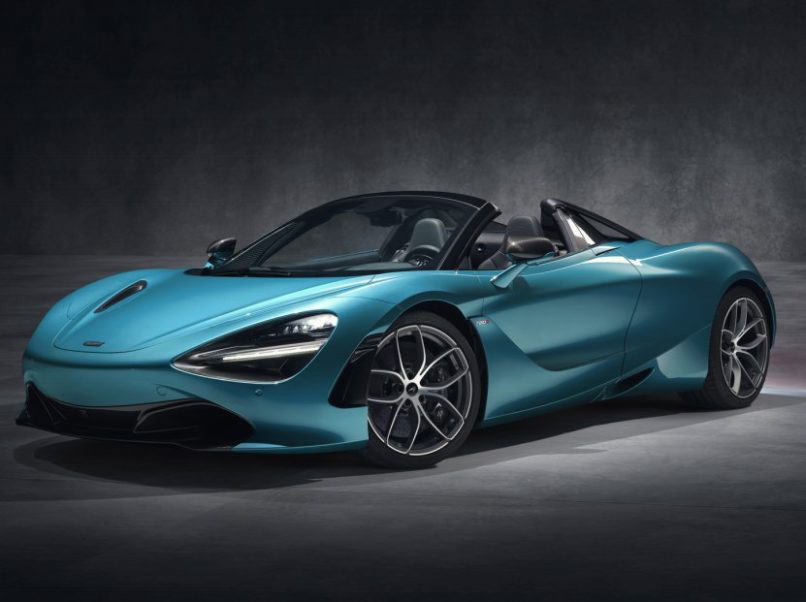

Time :  11.795


In [1]:
from PIL import Image
import numpy as np
import math
from IPython.display import display
import time


'''
@author : Dinesh Nariani
'''

#reading the image into a 3d array 
#ROW (height) x COLUMN(Width) x COLORS(3)
src_image = np.array(Image.open('/content/jgyfgjpg-806x602.jpg').convert("RGB"))
width=src_image.shape[1]
height=src_image.shape[0]
print('Input Image Dimension = ',src_image.shape[1])
display(Image.open('/content/jgyfgjpg-806x602.jpg'))
#input source


# start time
start = time.time()

#generating a key for encryption and decryption
key= np.random.randint(2, size=(height*3, height*3))
print('Key Dimension = ',key.shape)


#original 3d array of image is now reshaped into 2d
reshaped=src_image.reshape(height*3,width)
print('Reshaped 2D Input Image Dimension = ',reshaped.shape)

#encrypt_2d is a result of multiplying key matrix(randomly generated) and the reshaped input array
encrypt_2d=key.dot(reshaped)

#the true encrypted matrix , corresponds to encrypted image
encrypt=encrypt_2d.reshape(height,width,3)

#save the image
save_image=Image.fromarray((encrypt * 255).astype(np.uint8))
save_image.save('m_encrypt.png')
display(save_image)

#encrypted image saved as m_encrypt.png

# Decrypt the image
#reshape the encrypted matrix to 2D array/2D matrix
#kinda reverse engineering

decrypt_2d=encrypt.reshape(height*3,width)
print('Decrypted 2D Image Dimension = ',reshaped.shape)

#take inverse of the initially generated key matrix
key_inverse=np.linalg.inv(key)

#multiply the inverse of the key to reshaped encrypted matrix
#again a transformation , think about the key matrix like a function
decrypted_2d=key_inverse.dot(decrypt_2d)

decrypted=decrypted_2d.reshape(height,width,3)
print('Decrypted Image Dimension = ',decrypted.shape)

# end time
end = time.time()

#final touch up
decrypted=decrypted.astype(np.uint8)

# save the decrypted image
save_image=Image.fromarray(decrypted)
save_image.save('m_decrypt.png')
display(Image.open('m_decrypt.png'))
#decryption done

print('Time : ',round(end - start,4))